In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [2]:
(train_img,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [3]:
train_img

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
train_img.shape

(50000, 32, 32, 3)

In [5]:
test_images

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [6]:
train_img[0][0][0].shape

(3,)

In [7]:
test_images.shape

(10000, 32, 32, 3)

In [8]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
train_labels.shape

(50000, 1)

In [10]:
train_labels[0]

array([6], dtype=uint8)

In [11]:
train_img=train_img/255.0


In [12]:
test_images=test_images/255.0

###  onehot encoding 

In [13]:
# from sklearn.preprocessing import OneHotEncoder
# o1=OneHotEncoder(handle_unknown='ignore',sparse="False")
# train_labels_new=o1.fit_transform(train_labels)

In [14]:
# train_labels_new

In [15]:
# train_labels_new[0]

In [16]:
train_img[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

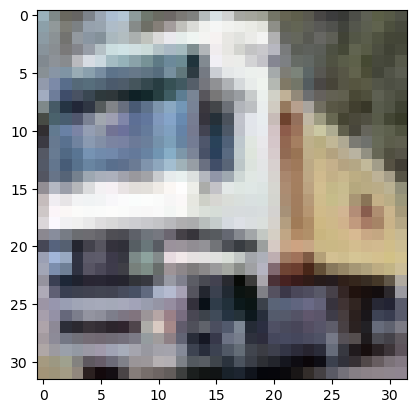

In [17]:
plt.imshow(train_img[1])

# Creating the model 

In [18]:
cnn1=models.Sequential()
cnn1.add(layers.Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)))
cnn1.add(layers.MaxPooling2D((2,2)))
cnn1.add(layers.Conv2D(32,(3,3),activation='relu'))
cnn1.add(layers.MaxPooling2D((3,3)))
# cnn1.add(layers.Conv2D(64,(3,3),activation='relu'))

In [19]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


In [20]:
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(32,activation='relu'))
cnn1.add(layers.Dense(10,activation='softmax'))

In [21]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                1

## Compile 

In [22]:
cnn1.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [23]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                1

In [46]:
hist1=cnn1.fit(train_img,train_labels,epochs=20,validation_data=(test_images,test_labels),batch_size=64)

Epoch 1/20
782/782 [==============================] - 53s 68ms/step - loss: 0.8300 - accuracy: 0.7112 - val_loss: 1.0036 - val_accuracy: 0.6586
Epoch 2/20
782/782 [==============================] - 19s 24ms/step - loss: 0.8221 - accuracy: 0.7148 - val_loss: 0.9343 - val_accuracy: 0.6893
Epoch 3/20
782/782 [==============================] - 22s 28ms/step - loss: 0.8136 - accuracy: 0.7205 - val_loss: 0.9301 - val_accuracy: 0.6852
Epoch 4/20
782/782 [==============================] - 24s 31ms/step - loss: 0.8017 - accuracy: 0.7237 - val_loss: 0.9415 - val_accuracy: 0.6803
Epoch 5/20
782/782 [==============================] - 25s 32ms/step - loss: 0.7921 - accuracy: 0.7262 - val_loss: 0.9250 - val_accuracy: 0.6896
Epoch 6/20
782/782 [==============================] - 20s 25ms/step - loss: 0.7839 - accuracy: 0.7296 - val_loss: 0.9596 - val_accuracy: 0.6795
Epoch 7/20
782/782 [==============================] - 21s 27ms/step - loss: 0.7764 - accuracy: 0.7334 - val_loss: 0.9696 - val_accuracy:

In [47]:
test_loss, test_acc = cnn1.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 0.9212 - accuracy: 0.6967 - 2s/epoch - 8ms/step


In [48]:
y_pred=cnn1.predict(test_images)

313/313 [==============================] - 2s 8ms/step


In [49]:
test_acc

0.6966999769210815

In [50]:
y_pred[0]

array([1.1524849e-03, 8.2100254e-05, 3.6321782e-02, 2.9947042e-01,
       1.0359825e-02, 5.9660274e-01, 4.0464010e-02, 1.9037343e-03,
       1.3493484e-02, 1.4941055e-04], dtype=float32)

In [51]:
test_labels.shape

(10000, 1)

In [52]:
def pred_labels(y_pred):
    labels=[]
    for i in range(10000):
        list1=list(y_pred[i])
        index=list1.index(max(list1))
        labels.append(index)
    return labels

In [53]:
prediction=pred_labels(y_pred)
prediction=np.asarray(prediction)
prediction

array([5, 1, 8, ..., 5, 1, 7])

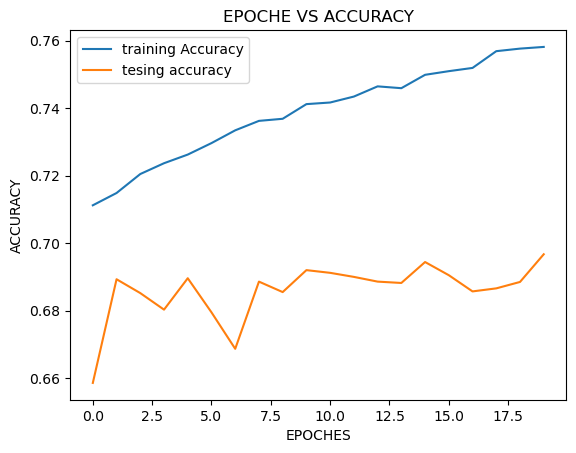

In [54]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.legend(["training Accuracy","tesing accuracy"])
plt.title("EPOCHE VS ACCURACY")
plt.yticks(np.arrange(0 1.0 ))
plt.xlabel("EPOCHES")
plt.ylabel("ACCURACY")
plt.show()

## Kfold cross validation 

In [33]:
x=np.concatenate([train_img,test_images],axis=0)
y=np.concatenate([train_labels,test_labels],axis=0)

In [34]:
kfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=0)

In [36]:
scores=[]
hist=[]
i=0
for train, test in kfold.split(x,y):
        model = models.Sequential()
        model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(32, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(32, activation='relu'))
        model.add(layers.Dense(10,activation='softmax'))
        model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        print("---------------------------------------model ",i+1," start---------------------------------------------")
        hist.append(model.fit(x[train], y[train],validation_data=(x[test],y[test]),epochs=10,batch_size = 32))
        scores.append(model.evaluate(x[test], y[test]))
        print(f"---------------------------------------model" , i+1," end---------------------------------------------")
        i=i+1


---------------------------------------model  1  start---------------------------------------------
Epoch 1/10


C:\Users\Rehan\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 [==============================] - 42s 33ms/step - loss: 1.6411 - accuracy: 0.4053 - val_loss: 1.4449 - val_accuracy: 0.4872
Epoch 2/10
1250/1250 [==============================] - 58s 47ms/step - loss: 1.3105 - accuracy: 0.5372 - val_loss: 1.2214 - val_accuracy: 0.5705
Epoch 3/10
1250/1250 [==============================] - 59s 47ms/step - loss: 1.1728 - accuracy: 0.5876 - val_loss: 1.2005 - val_accuracy: 0.5814
Epoch 4/10
1250/1250 [==============================] - 59s 47ms/step - loss: 1.0906 - accuracy: 0.6169 - val_loss: 1.1055 - val_accuracy: 0.6127
Epoch 5/10
1250/1250 [==============================] - 60s 48ms/step - loss: 1.0318 - accuracy: 0.6409 - val_loss: 1.0754 - val_accuracy: 0.6227
Epoch 6/10
1250/1250 [==============================] - 63s 51ms/step - loss: 0.9921 - accuracy: 0.6573 - val_loss: 1.0787 - val_accuracy: 0.6269
Epoch 7/10
1250/1250 [==============================] - 62s 50ms/step - loss: 0.9561 - accuracy: 0.6678 - val_loss: 1.0401 - val_accura

###  printing epoches vs accuracy graph


Model  1


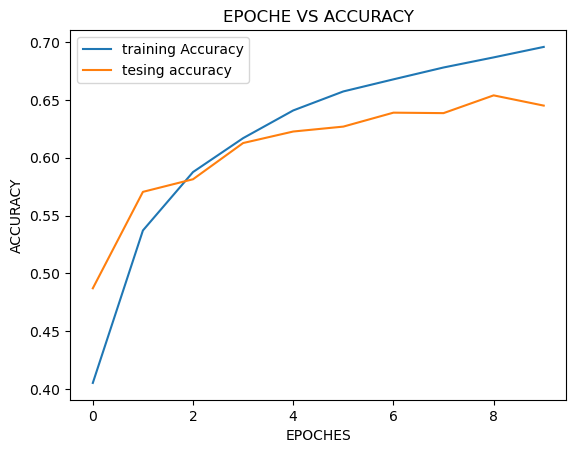

Model  2


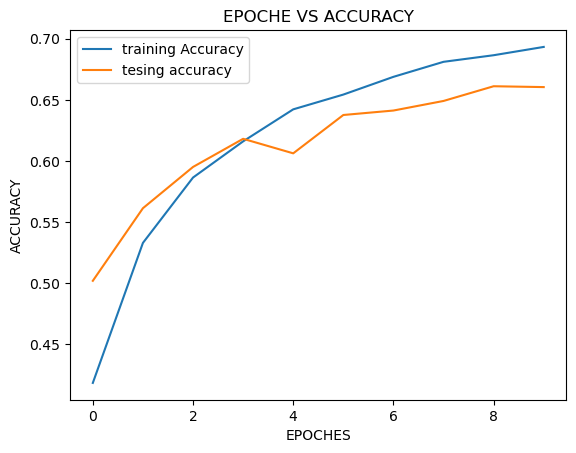

Model  3


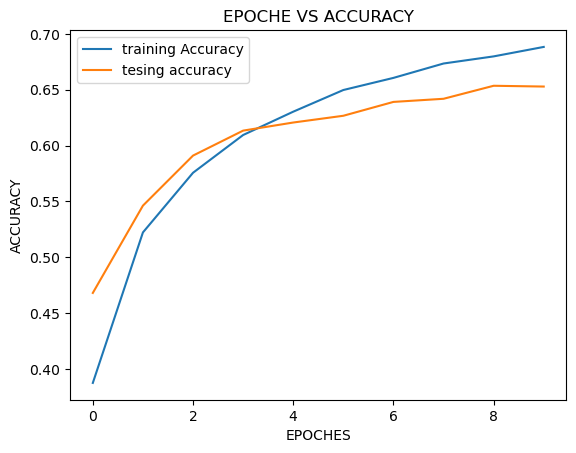

In [38]:
for i in range(3):
    print("Model ",i+1)
    plt.plot(hist[i].history['accuracy'])
    plt.plot(hist[i].history['val_accuracy'])
    plt.legend(["training Accuracy","tesing accuracy"])
    plt.title("EPOCHE VS ACCURACY")
    plt.xlabel("EPOCHES")
    plt.ylabel("ACCURACY")
    plt.show()
    

### Epoches vs loss

Model  1


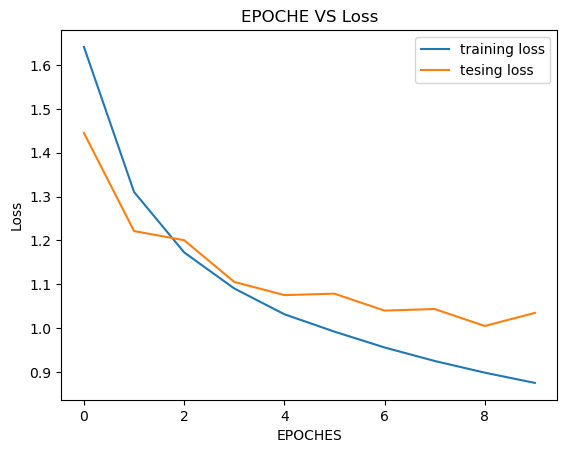

Model  2


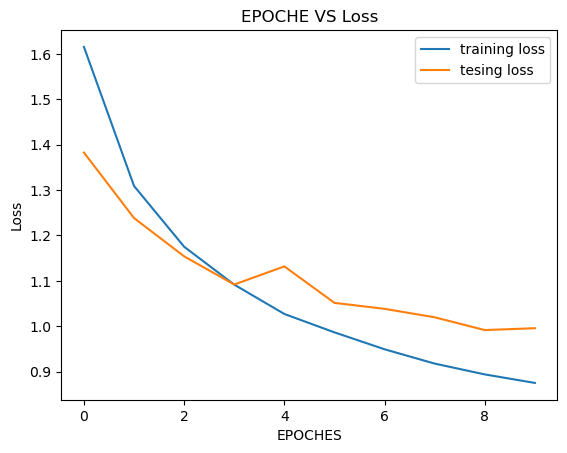

Model  3


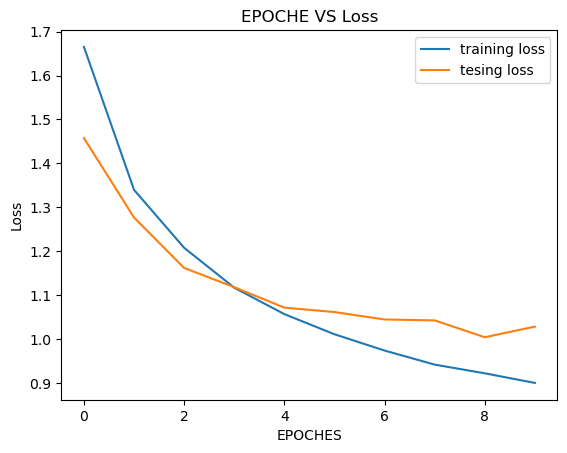

In [39]:
for i in range(3):
    print("Model ",i+1)
    plt.plot(hist[i].history['loss'])
    plt.plot(hist[i].history['val_loss'])
    plt.legend(["training loss","tesing loss"])
    plt.title("EPOCHE VS Loss")
    plt.xlabel("EPOCHES")
    plt.ylabel("Loss")
    plt.show()
    

In [55]:
accuracy_list=[]
for i in range(3):
    accuracy_list.append(scores[i][1])
print("AVERAGE ACCURACY OF THE MODEL AFTER THREE FOLD VALIDATION ")
print("ACCURACIES : ",accuracy_list)
print("Mean Accuracy : ",sum(accuracy_list)/len(accuracy_list))

AVERAGE ACCURACY OF THE MODEL AFTER THREE FOLD VALIDATION 
ACCURACIES :  [0.6450499892234802, 0.6603999733924866, 0.6528499722480774]
Mean Accuracy :  0.6527666449546814
